In [1]:
from sklearn.datasets import fetch_mldata
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(100)

mnist1 = fetch_mldata('MNIST original')

X, y = mnist1['data'], mnist1['target']

X_train = X[:55000]
X_test = X[55000:65000]
X_val = X[65000:]

y = y.astype(int)

y_train = y[:55000]
y_test = y[55000:65000]
y_val = y[65000:]

shuffle_index = np.random.permutation(55000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = 'Greys', interpolation="nearest")
    plt.axis("off")
    pass

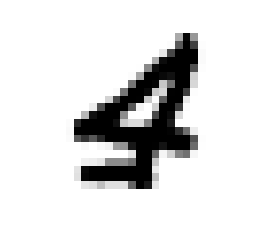

In [2]:
plot_digit(X_train[20000])

In [3]:
import scipy.special

class neuralNetwork:
    
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        self.lr = learningrate
        
        self.wih = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        
        self.activation_function = lambda x: scipy.special.expit(x)
        pass
    
    def train(self, inputs_list, targets_list):
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        
        hidden_inputs = np.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        output_errors = targets - final_outputs
        hidden_errors = np.dot(self.who.T, output_errors)
        
        self.who += self.lr * np.dot((output_errors * final_outputs * (1 - final_outputs)), np.transpose(hidden_outputs))
        
        self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1 - hidden_outputs)), np.transpose(inputs))
        
        pass
        
            
    
    def query(self, inputs_list):
        
        inputs = np.array(inputs_list, ndmin=2).T
        
        hidden_inputs = np.dot(self.wih, inputs)
        
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = np.dot(self.who, hidden_outputs)
        
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs


# Initialize the model

In [4]:
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

learning_rate = 0.2

n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

# Train the model

In [5]:
for i in range(0, X_train.shape[0]):
    inputs = X_train[i]
    targets = np.zeros(output_nodes) + 0.01
    targets[int(y_train[i])] = 0.99
    n.train(inputs, targets)
    pass

# Predict the train labels

In [6]:
train_scorecard = []

for i in range(0, X_train.shape[0]):
    inputs = X_train[i]
    correct_label = y_train[i]
    
    outputs = n.query(inputs)
    label = np.argmax(outputs)
    
    if label == correct_label:
        train_scorecard.append(1)
    else:
        train_scorecard.append(0)
        pass
    pass

# Predict the test labels

In [7]:
test_scorecard = []

for i in range(0, X_test.shape[0]):
    inputs = X_test[i]
    correct_label = y_test[i]
    
    outputs = n.query(inputs)
    label = np.argmax(outputs)
    
    if label == correct_label:
        test_scorecard.append(1)
    else:
        test_scorecard.append(0)
        pass
    pass

In [8]:
print 'Train Accuracy: ', (float(np.sum(train_scorecard)) / X_train.shape[0])
print 'Test Accuracy: ', (float(np.sum(test_scorecard)) / X_test.shape[0])

Train Accuracy:  0.152618181818
Test Accuracy:  0.0831


# Scaling the features

In [9]:
X_train_scaled = np.asarray(map(lambda x: (((x / 255.0) * 0.99) + 0.01), X_train))
X_test_scaled = np.asarray(map(lambda x: (((x / 255.0) * 0.99) + 0.01), X_test))

# Train the model (scaled)

In [10]:
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

for i in range(0, X_train_scaled.shape[0]):
    inputs = X_train_scaled[i]
    targets = np.zeros(output_nodes) + 0.01
    targets[int(y_train[i])] = 0.99
    n.train(inputs, targets)
    pass

# Predict the train labels (scaled)

In [11]:
train_scorecard_scaled = []

for i in range(0, X_train_scaled.shape[0]):
    inputs = X_train_scaled[i]
    correct_label = y_train[i]
    
    outputs = n.query(inputs)
    label = np.argmax(outputs)
    
    if label == correct_label:
        train_scorecard_scaled.append(1)
    else:
        train_scorecard_scaled.append(0)
        pass
    pass

# Predict the test labels (scaled)

In [12]:
test_scorecard_scaled = []

for i in range(0, X_test_scaled.shape[0]):
    inputs = X_test_scaled[i]
    correct_label = y_test[i]
    
    outputs = n.query(inputs)
    label = np.argmax(outputs)
    
    if label == correct_label:
        test_scorecard_scaled.append(1)
    else:
        test_scorecard_scaled.append(0)
        pass
    pass

In [13]:
print 'Train Accuracy: ', (float(np.sum(train_scorecard_scaled)) / X_train_scaled.shape[0])
print 'Test Accuracy: ', (float(np.sum(test_scorecard_scaled)) / X_test_scaled.shape[0])

Train Accuracy:  0.970727272727
Test Accuracy:  0.8104
